# Walkthrough

# Importing modules

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preparation (for modelling)


In [3]:
preprocessed_dataframes = []
validated_data = [
    ['bam.csv', 'Comment', 'Comment type (Text-based)',['Comment Image Rate','Account','Comment Validation (Context-based)','Notes','Video Link', 'Unnamed: 7']],
    ['BH_malasakit.csv','comment_text','sents',['likes','tiktok_user_id','created_date','replies_num','comment_id']],
    ['five_one.csv','comment_text','sentiments',['1 neutral, 0 negative, 2 positive']],
    ['fourtwo.csv','comment_text','sentiments',['Unnamed: 0']],
    ['free tuition.csv','comment_text','CONTEXT-BASED',['url','content_creator']],
    ['giucoma_comments.csv','comment_text','TEXT-BASED',['Account','comment_username','comment_date','CONTEXT-BASED','comment_like_count','comment_id','reply_to','url','creator']],
    ['Lazada Review.csv','review','rating', ['Unnamed: 0']]
]

In [4]:
for raw in validated_data:
    x = preprocess(df='validated data/{}'.format(raw[0]), added_stopwords='model_stopwords.csv', comment_column=raw[1], sent_column=[raw[2]], dups=1, dup_subset=[raw[1]], 
                     drop=raw[3])
    preprocessed_dataframes.append(x.df)

Column Headers:  ['Comment', 'Comment type (Text-based)', 'Comment Image Rate', 'Account', 'Comment Validation (Context-based)', 'Notes', 'Video Link', 'Unnamed: 7']
shape of raw dataframe:  (5496, 8)
Sentiment null count:  Comment type (Text-based)    0
dtype: int64
Comment type (Text-based)
neutral                      3289
negative                     1561
positive                      640
positve                         2
nagative                        1
neitral                         1
posiive                         1
dtype: int64
shape of mapped dataframe:  (5495, 8)
Sentiment null count:  Comment type (Text-based)    0
dtype: int64
shape of dataframe when null comments were dropped:  (5495, 10)
shape of dataframe when preprocessed and duplicated values where dropped:  (3175, 10)
shape of final dataframe when rows that have null values where dropped:  (3175, 4)
Column Headers:  ['likes', 'comment_text', 'tiktok_user_id', 'created_date', 'replies_num', 'comment_id', 'sents']
sh

In [5]:
renamed = []
for preprocessed in preprocessed_dataframes:
    preprocessed.rename(columns={'features_string_format': 'text'}, inplace=True, errors='raise')
    renamed.append(preprocessed[['text','sentiments']])

In [6]:
final_df = pd.concat(renamed)

In [7]:
final_df.shape

(14545, 2)

In [8]:
final_df['sentiments'].value_counts()

1.0    8924
0.0    2898
2.0    2718
Name: sentiments, dtype: int64

In [9]:
final_preprocess = preprocess(df=final_df, added_stopwords='model_stopwords.csv', use_for=1, comment_column='text', sent_column=['sentiments'], dups=1, dup_subset=['text'])

Column Headers:  ['text', 'sentiments']
shape of raw dataframe:  (14545, 2)
Sentiment null count:  sentiments    0
dtype: int64
sentiments
1.0           8924
0.0           2898
2.0           2718
dtype: int64
shape of mapped dataframe:  (14540, 2)
Sentiment null count:  sentiments    0
dtype: int64
shape of dataframe when null comments were dropped:  (14540, 4)
shape of dataframe when preprocessed and duplicated values where dropped:  (12242, 4)
shape of final dataframe when rows that have null values where dropped:  (12242, 4)


C:\project\work\classes.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(subset=["features_string_format"], inplace=True)


In [10]:
final_preprocess.df.shape

(12242, 4)

In [11]:
final_preprocess.df['sentiments'].value_counts()

1    7336
0    2681
2    2225
Name: sentiments, dtype: int64

In [12]:
final_preprocess.df.to_csv("12k_preprocessed_data.csv")

# Exploratory Data analysis of modelling data

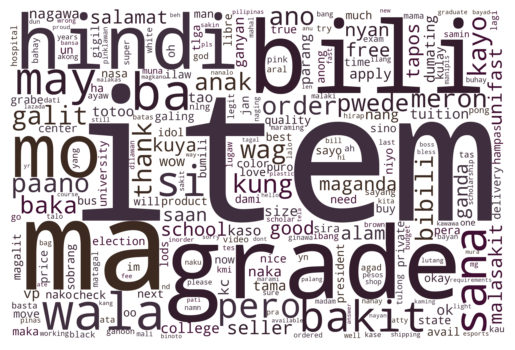

In [14]:
model_eda = eda(df=final_preprocess.df, text_column_name='text', sent_column_name='sentiments', folder='model vis')
model_eda.generate_wordcloud()

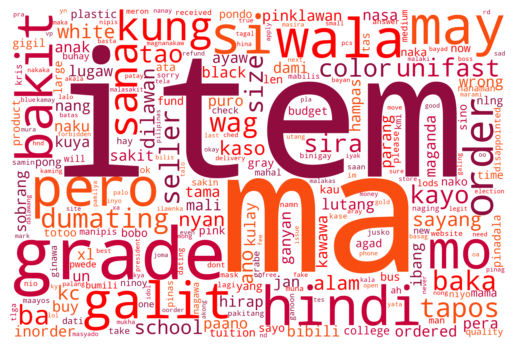

In [15]:
model_eda.generate_wordcloud(category='sentiments', value=0)

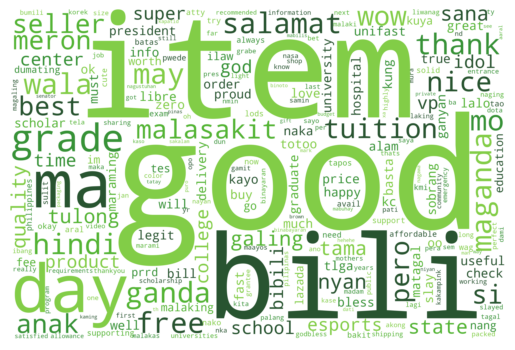

In [16]:
model_eda.generate_wordcloud(category='sentiments', value=2)

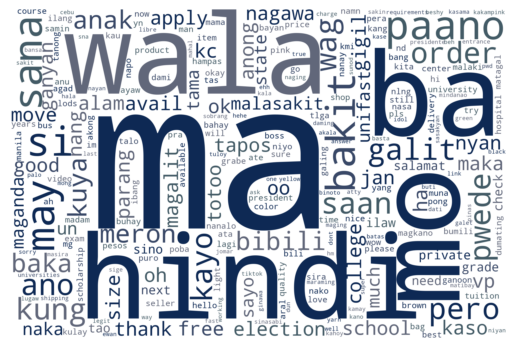

In [17]:
model_eda.generate_wordcloud(category='sentiments', value=1)

# Add synthetic negative and positive comments

In [18]:
final_preprocess.df['sentiments'].value_counts()

1    7336
0    2681
2    2225
Name: sentiments, dtype: int64

In [19]:
added_positive = final_preprocess.paraphrase([['super','super duper'],['useful','convenient'], ['ganda','maganda'], 
                                        ['good','great'], ['galing','magaling'], ['free tuition','libreng edukasyon'], ['fast','mabilis'], 
                                              ['info','information'], ['nice','solid'], ['true','totoo'], ['love','like'],
                                              ['malaking','napakalaking']], 2)

In [20]:
added_positive.shape

(536, 4)

In [21]:
added_negative = final_preprocess.paraphrase([['galit','inis'],['wrong','mali']], 0)

In [22]:
added_negative.shape

(121, 4)

In [23]:
final_data = pd.concat([final_preprocess.df, added_positive, added_negative])

In [24]:
final_data.head()

,text,sentiments,features,features_string_format
0,sandali pagout magreact ready for love,1,"[sandali, pagout, magreact, ready, for, love]",sandali pagout magreact ready for love
1,madaling hulaan presidente binoto mo pramis ke...,1,"[madaling, hulaan, presidente, binoto, mo, pra...",madaling hulaan presidente binoto mo pramis ke...
2,kuya reaction video ready for love bp,1,"[kuya, reaction, video, ready, for, love, bp]",kuya reaction video ready for love bp
3,reaction to blackpini ready for love,1,"[reaction, to, blackpini, ready, for, love]",reaction to blackpini ready for love
4,beb beyonce fan ba renaissance is out,1,"[beb, beyonce, fan, ba, renaissance, is, out]",beb beyonce fan ba renaissance is out


In [25]:
final_data['sentiments'].value_counts()

1    7336
0    2802
2    2761
Name: sentiments, dtype: int64

# Balancing data

In [26]:
positive = final_data[final_data['sentiments'] == 2]
negative = final_data[final_data['sentiments'] == 0]
neutral = final_data[final_data['sentiments'] == 1]
neutral = neutral.sample(2802)
negative = negative.sample(2802)
positive = positive.sample(2802, replace=True)

In [27]:
balanced8_4k =  pd.concat([neutral[['sentiments','features_string_format']],negative[['sentiments','features_string_format']],positive[['sentiments','features_string_format']]], axis=0)

In [28]:
balanced8_4k.shape

(8406, 2)

In [29]:
balanced8_4k['sentiments'].value_counts()

1    2802
0    2802
2    2802
Name: sentiments, dtype: int64

In [30]:
balanced8_4k.to_csv('preprocessed_v1.csv')

# Modelling

In [31]:
# create a model for related to bam and context based
x = models(df=balanced8_4k, x='features_string_format', y='sentiments', filename='text base model v3_1')

In [32]:
x.svm()

svm or dectree
Accuracy: 0.7348394768133175
F1 score (micro): 0.7348394768133175
F1 score (macro): 0.7372636215495579
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       561
           1       0.63      0.69      0.65       560
           2       0.90      0.84      0.87       561

    accuracy                           0.73      1682
   macro avg       0.74      0.73      0.74      1682
weighted avg       0.74      0.73      0.74      1682



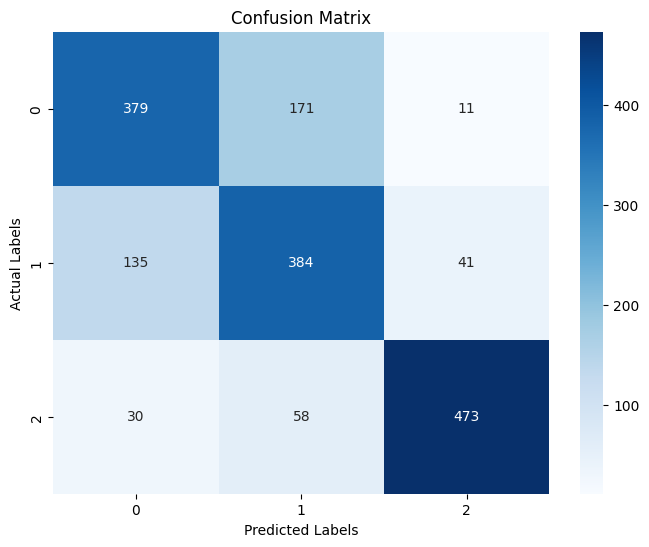

In [33]:
x.evaluate_model()

In [34]:
y = models(df=balanced8_4k, x='features_string_format', y='sentiments', filename='text base model v3_1')

In [35]:
y.decision_tree()

svm or dectree
Accuracy: 0.6575505350772889
F1 score (micro): 0.6575505350772889
F1 score (macro): 0.6562515214453611
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       561
           1       0.58      0.60      0.59       561
           2       0.76      0.80      0.78       560

    accuracy                           0.66      1682
   macro avg       0.66      0.66      0.66      1682
weighted avg       0.66      0.66      0.66      1682



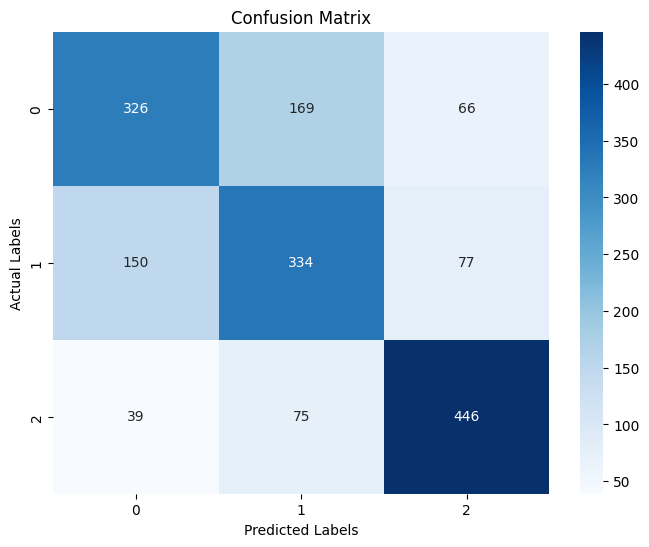

In [36]:
y.evaluate_model()

# END OF PROGRAM